In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Stain
data = pd.read_excel('dataset (multiaxial).xlsx') #Renishaw and EOS
data

,Loading Type,Build Orientation,Control Mode,σ_a (MPa),ε_a (%),Δε_p/2,τ_a (MPa),γ_a/2 (%),Surface τ_a (MPa),Surface γ_a (%),Surface dγ_p/2 (%),Surface σ_a (MPa),Surface ε_a (%),2Nf (Reversals)
0,A,V,Strain,775,1,0.348,-,-,-,-,-,775,1.000,2332
1,A,V,Strain,725,0.67,0.05,-,-,-,-,-,725,0.670,25232
2,A,V,Load,656,0.54,-,-,-,-,-,-,656,0.540,207274
3,A,V,Load,655,0.551,-,-,-,-,-,-,655,0.551,280296
4,A,V,Load,589,0.495,-,-,-,-,-,-,589,0.495,791938
5,A,V,Load,586,0.493,-,-,-,-,-,-,586,0.493,353404
6,A,45°,Strain,830,1,0.302,-,-,-,-,-,830,1.000,2170
7,A,45°,Strain,754,0.67,0.036,-,-,-,-,-,754,0.670,24768
8,A,45°,Load,653,0.549,-,-,-,-,-,-,653,0.549,142682
9,A,45°,Load,585,0.492,-,-,-,-,-,-,585,0.492,289734


In [13]:
# Filter data for Axial (A) and Torsion (T) with Build Orientation V
filtered_data = data[(data["Loading Type"].isin(["T"])) & (data["Build Orientation"] == "V")]
filtered_data

,Loading Type,Build Orientation,Control Mode,σ_a (MPa),ε_a (%),Δε_p/2,τ_a (MPa),γ_a/2 (%),Surface τ_a (MPa),Surface γ_a (%),Surface dγ_p/2 (%),Surface σ_a (MPa),Surface ε_a (%),2Nf (Reversals)
11,T,V,Strain,-,-,-,481,0.785,487,2,0.934,844,1.237,2872
12,T,V,Strain,-,-,-,441,0.185,453,1.25,0.259,784,0.802,22686
13,T,V,Strain,-,-,-,400,0.119,418,1.08,0.166,723,0.714,137362
14,T,V,Load,-,-,-,322,-,348,0.76,-,603,0.511,10000000


In [29]:
filtered_data

,2Nf (Reversals),σa (MPa),Δγ (%),Δγ
0,2872,844,0.934,0.00934
1,22686,784,0.259,0.00259
2,137362,723,0.166,0.00166
3,10000000,603,0.511,0.00511


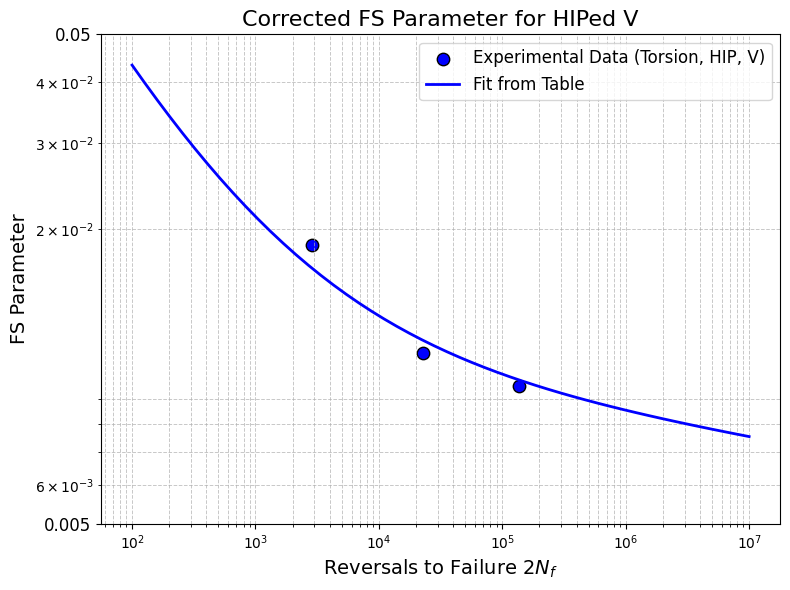

In [33]:



# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Given material properties for HIPed V (from table)
G               = 45.7 * 1e3    # Shear modulus in MPa (converted from GPa)
sigma_y         = 886           # Yield strength in MPa
tau_f_prime     = 683           # Shear fatigue strength coefficient in MPa
b0              = -0.0417       # Shear fatigue strength exponent
gamma_f_prime   = 0.4           # Shear fatigue ductility coefficient
c0              = -0.481        # Shear fatigue ductility exponent
k               = 1          # Material constant
sigma_y         = 886

# Recreate experimental dataset (manually extracted from table image)
data = {
    "2Nf (Reversals)": np.array([2872, 22686, 137362]),  # Fatigue life in reversals
    "σa (MPa)": np.array([844, 784, 723]),  # Applied max normal stress in MPa
    "Δγ (%)": np.array([0.934, 0.259, 0.166])  # Shear strain range as percentage
}

# Convert data to DataFrame
filtered_data = pd.DataFrame(data)

# Convert strain percentage to decimal values
filtered_data["Δγ"] = 2*filtered_data["Δγ (%)"] / 100

# Extract experimental values
Nf_exp = filtered_data["2Nf (Reversals)"].values  # Reversals to failure
delta_gamma_max_exp = filtered_data["Δγ"].values  # Normalized shear strain range
sigma_n_max_exp = filtered_data["σa (MPa)"].values  # Maximum normal stress

# Compute FS parameter using the correct formulation for each test condition
FS_exp = (delta_gamma_max_exp / 2) * (1 + k * (sigma_n_max_exp / (G * delta_gamma_max_exp)))

# Define a range for 2Nf (Reversals to failure) in log scale
Nf_range = np.logspace(2, 7, num=50)  # 50 points between 10^2 and 10^7

# Compute FS parameter theoretical fit curve
FS_fit_corrected = (tau_f_prime / G) * (2 * Nf_range) ** b0 + gamma_f_prime * (2 * Nf_range) ** c0

# Plot the corrected FS parameter vs fatigue life
plt.figure(figsize=(8, 6))

# Scatter plot for experimental FS parameter values
plt.scatter(Nf_exp, FS_exp, marker="o", color='blue', s=80, edgecolors="black", label="Experimental Data (Torsion, HIP, V)")

# Corrected fit curve from table
plt.plot(Nf_range, FS_fit_corrected, label="Fit from Table", color="blue", linewidth=2)

# Log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Axis labels and title
plt.xlabel("Reversals to Failure $2N_f$", fontsize=14)
plt.ylabel("FS Parameter", fontsize=14)
plt.title("Corrected FS Parameter for HIPed V", fontsize=16)

plt.yticks([0.005, 0.05], labels=["0.005", "0.05"], fontsize=12)

# Grid and legend
plt.grid(which="both", linestyle="--", linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the corrected plot
plt.show()


In [22]:
filtered_data_copy

,Loading Type,Build Orientation,Control Mode,σ_a (MPa),ε_a (%),Δε_p/2,τ_a (MPa),γ_a/2 (%),Surface τ_a (MPa),Surface γ_a (%),Surface dγ_p/2 (%),Surface σ_a (MPa),Surface ε_a (%),2Nf (Reversals),FS Parameter
11,T,V,Strain,-,-,-,481,0.785,487,2,0.934,844,1.237,2872,0.185003
12,T,V,Strain,-,-,-,441,0.185,453,1.25,0.259,784,0.802,22686,0.185003
13,T,V,Strain,-,-,-,400,0.119,418,1.08,0.166,723,0.714,137362,0.185003
14,T,V,Load,-,-,-,322,-,348,0.76,-,603,0.511,10000000,0.185003
